In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [3]:
def parse_line(line):
    if 'init_population' in line:
        # This is the config line
        items = line.split(', ')
        config_dict = {}
        for item in items:
            key, value = item.lower().split(': ')
            config_dict[key] = value
        return config_dict
    else:
        # This is a data line
        items = line.split(', ')
        data_dict = {}
        for item in items:
            key, value = item.lower().split(': ')
            data_dict[key] = float(value)
        return data_dict

def parse_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    config = parse_line(lines[0])
    data = [parse_line(line) for line in lines[1:]]

    # group data by generation
    data_dict = {}
    for individual in data:
        generation = individual['generation']
        if generation not in data_dict:
            data_dict[generation] = []
        data_dict[generation].append(individual)

    return config, data_dict

def plot_generations_interactive(generations_data):
    fig = go.Figure()

    # Create a color map for the generations
    colors = [f'rgba({r}, {g}, {b}, 1)' for r, g, b, _ in 255 * plt.cm.viridis(np.linspace(0, 1, len(generations_data)))]

    for generation, individuals in generations_data.items():
        heights = [individual['height'] for individual in individuals]
        deviations = [individual['dev'] for individual in individuals]
        fitnesses = [individual['fitness'] for individual in individuals]
        fig.add_trace(go.Scatter3d(
            x=heights, y=deviations, z=fitnesses,
            mode='markers',
            marker=dict(size=5, color=colors[int(generation)], opacity=0.8),
            name=f'Generation {generation}'
        ))

    # Set titles for the axes
    fig.update_layout(
        scene=dict(
            xaxis_title='Height',
            yaxis_title='Deviation',
            zaxis_title='Fitness'
        ),
        margin=dict(r=0, b=0, l=0, t=0),
        showlegend=False
    )

    fig.show()
    
def plot_property_vs_fitness(generations_data, x_property, y_property='fitness'):
    plt.figure(figsize=(10, 6))

    # Create a color map for the generations
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(generations_data)))

    for generation, indviduals in generations_data.items():
        x_values = [individual[x_property] for individual in indviduals]
        y_values = [individual[y_property] for individual in indviduals]

        plt.scatter(x_values, y_values, color=colors[int(generation)], label=f'Generation {generation}')

    plt.xlabel(x_property.capitalize())
    plt.ylabel(y_property.capitalize())
    plt.title(f'{x_property.capitalize()} vs {y_property.capitalize()}')
    plt.show()

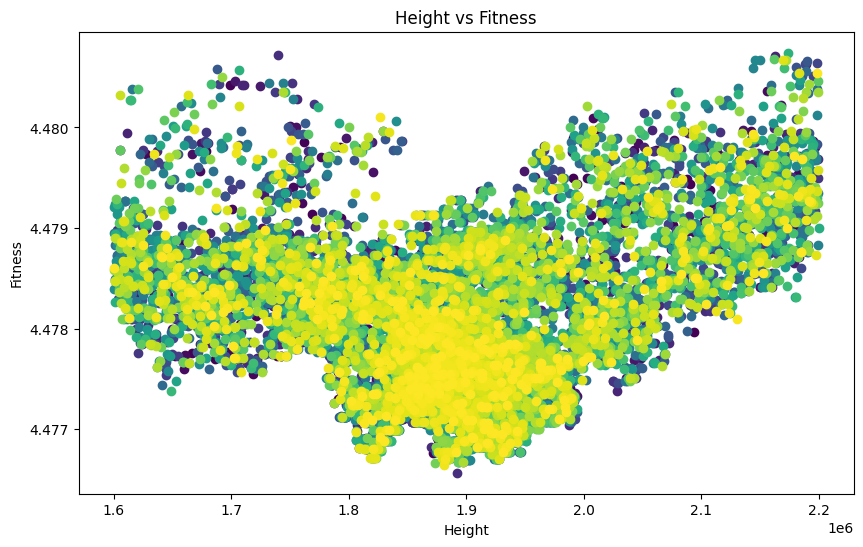

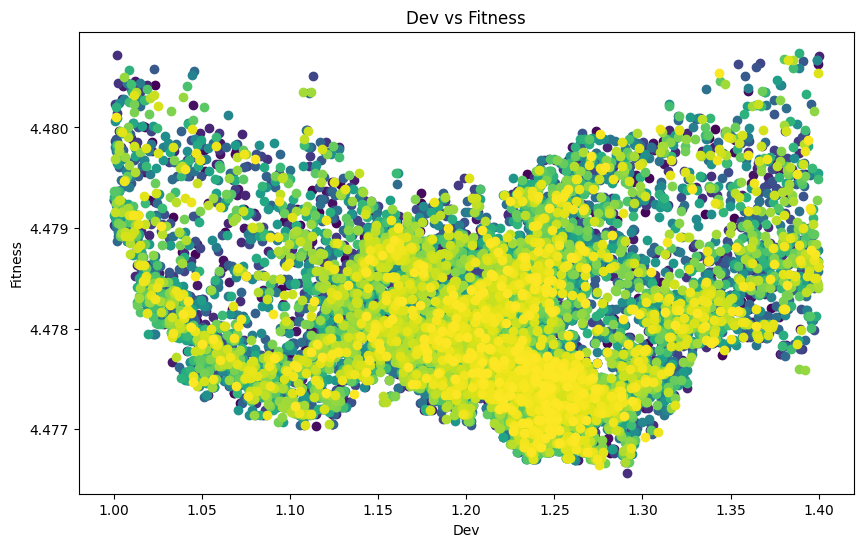

203
{'generation': 27.0, 'rank': 0.0, 'height': 1892466.8223735602, 'dev': 1.2915069114948352, 'fitness': 4.476569279046836}


In [5]:
filename = 'output15.txt'
config, data = parse_file(filename)
plot_generations_interactive(data)
plot_property_vs_fitness(data, 'height')
plot_property_vs_fitness(data, 'dev')
print(len(data))

# print the individual with the smallest fitness
min_fitness = float('inf')
min_individual = None
for generation, individuals in data.items():
    for individual in individuals:
        if individual['fitness'] < min_fitness:
            min_fitness = individual['fitness']
            min_individual = individual
print(min_individual)